*TASK-2 : NUMBER RECOGNITION*

Author: Divyanshi Sharma

Batch: September

Domain: Data Science

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import warnings

In [3]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
print("Number of training samples:",len(x_train))
print("Number of testing samples:",len(x_test))
print("Shape of an individual sample:",x_train[0].shape)

Number of training samples: 60000
Number of testing samples: 10000
Shape of an individual sample: (28, 28)


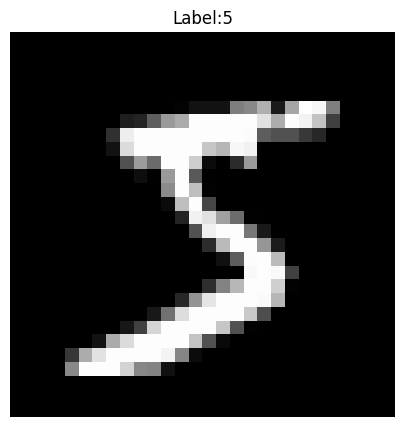

In [6]:
plt.figure(figsize=(5,5))
plt.imshow(x_train[0],cmap='gray')
plt.title(f"Label:{y_train[0]}")
plt.axis('off')
plt.show()

In [7]:
x_train=x_train/255
x_test=x_test/255

In [8]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
x_train_flattened=x_train.reshape(len(x_train),-1)
x_test_flattened=x_test.reshape(len(x_test),-1)

In [12]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
#Train the Model
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4682 - accuracy: 0.8777
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3037 - accuracy: 0.9158
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2836 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2732 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2661 - accuracy: 0.9258


In [14]:
test_loss,test_accuracy=model.evaluate(x_test_flattened,y_test)
print(f"Test loss:{test_loss:.4f},Test accuracy:{test_accuracy:.4f}")
model.fit(x_train_flattened,y_train,epochs=5)

313/313 [==============================] - 1s 3ms/step - loss: 0.2686 - accuracy: 0.9261
Test loss:0.2686,Test accuracy:0.9261
Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2617 - accuracy: 0.9270
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2583 - accuracy: 0.9281
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2556 - accuracy: 0.9294
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2529 - accuracy: 0.9295
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2513 - accuracy: 0.9305


In [15]:
y_predicted=model.predict(x_test_flattened)
y_predicted_labels=[np.argmax(i) for i in y_predicted]

313/313 [==============================] - 0s 1ms/step


In [16]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

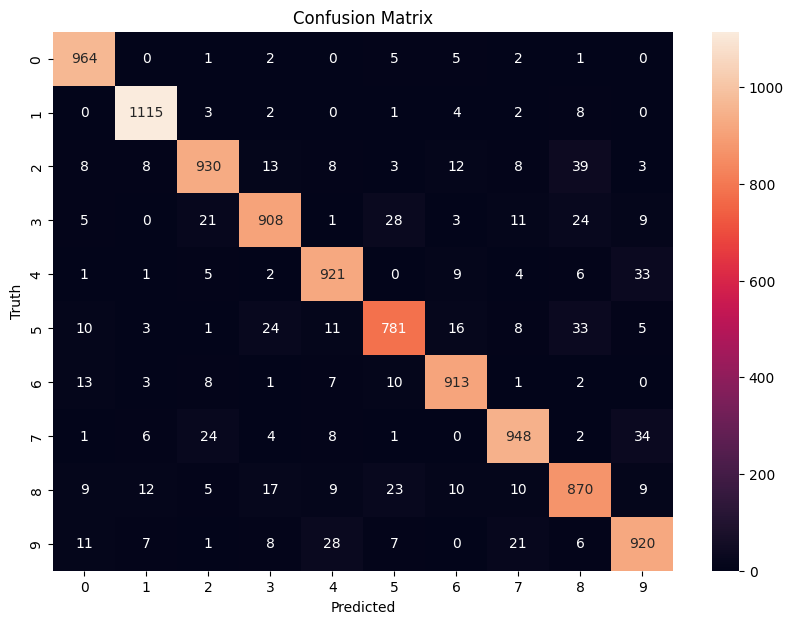

In [17]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

In [21]:
model_with_hidden=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model_with_hidden.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
)
model_with_hidden.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2733
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1257
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0882
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0671
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0525


In [31]:
sample_indices=np.random.randint(0,len(x_test),size=5)
sample_images=x_test[sample_indices]
sample_labels=y_test[sample_indices]
sample_images_flattened=sample_images.reshape(len(sample_images),-1)
sample_predictions=model_with_hidden.predict(sample_images_flattened)
predicted_classes=np.argmax(sample_predictions,axis=1)

1/1 [==============================] - 0s 87ms/step


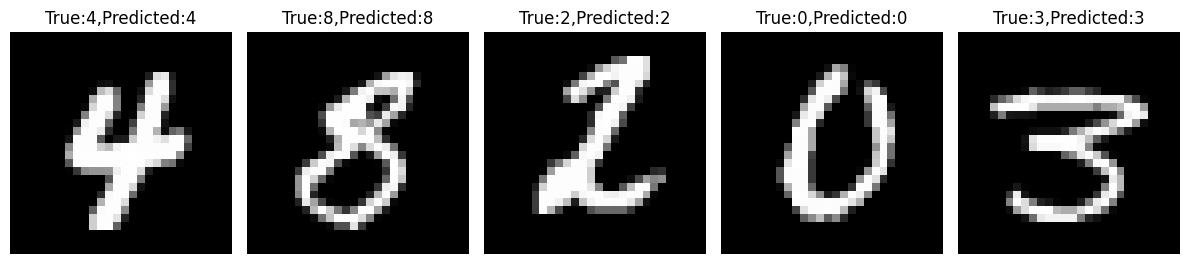

In [32]:
plt.figure(figsize=(12,4))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(sample_images[i],cmap='gray')
  plt.title(f"True:{sample_labels[i]},Predicted:{predicted_classes[i]}")
  plt.axis('off')
plt.tight_layout()
plt.show()